In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [155]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics

In [156]:
from imblearn.under_sampling import NearMiss

In [157]:
# df_06 = pd.read_csv('datasets/htx_2006_weather.csv', na_values='Blank').dropna()
df_10 = pd.read_csv('datasets/htx_2010_weather.csv', na_values='Blank').dropna()
df_11 = pd.read_csv('datasets/htx_2011_weather.csv', na_values='Blank').dropna()
df_12 = pd.read_csv('datasets/htx_2012_weather.csv', na_values='Blank').dropna() 
df_13 = pd.read_csv('datasets/htx_2013_weather.csv', na_values='Blank').dropna()
df_14 = pd.read_csv('datasets/htx_2014_weather.csv', na_values='Blank').dropna()
df_15 = pd.read_csv('datasets/htx_2015_weather.csv', na_values='Blank').dropna()
# df_18 = pd.read_csv('datasets/htx_2018_weather.csv', na_values='Blank').dropna()
# df_19 = pd.read_csv('datasets/htx_2019_weather.csv', na_values='Blank').dropna()
# df_21 = pd.read_csv('datasets/htx_2021_weather.csv', na_values='Blank').dropna()

df = pd.concat([df_10, df_11, df_12, df_13, df_14, df_15])

# df = pd.concat([df_06, df_10, df_11, df_12, df_13, df_14, df_15, df_18, df_19, df_21])
# df = df_06

In [158]:
df.rain_tomorrow = df.rain_tomorrow.map(dict(Yes=1, No=0))


In [159]:
df['rainfall_tomorrow'] = df['rainfall'].shift(1)
df.dropna()
df.head

<bound method NDFrame.head of            date  min_temp  max_temp  rainfall  wind_speed9am  wind_speed3pm  \
0    2010-01-01      43.0      55.0       0.0           15.0           15.0   
1    2010-01-02      35.0      53.0       0.0            5.0            7.0   
2    2010-01-03      43.0      48.0       0.0           14.0            9.0   
3    2010-01-04      36.0      48.0       0.0           15.0           14.0   
4    2010-01-05      30.0      49.0       0.0            9.0            5.0   
..          ...       ...       ...       ...            ...            ...   
360  2015-12-27      47.0      78.0       2.0           15.0           20.0   
361  2015-12-28      41.0      52.0       0.0           21.0           16.0   
362  2015-12-29      42.0      54.0       0.0            6.0            6.0   
363  2015-12-30      50.0      57.0       0.0           14.0            9.0   
364  2015-12-31      51.0      55.0       0.0           13.0           10.0   

     humidity9am  hum

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 364
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2172 non-null   object 
 1   min_temp           2172 non-null   float64
 2   max_temp           2172 non-null   float64
 3   rainfall           2172 non-null   float64
 4   wind_speed9am      2172 non-null   float64
 5   wind_speed3pm      2172 non-null   float64
 6   humidity9am        2172 non-null   float64
 7   humidity3pm        2172 non-null   float64
 8   pressure9am        2172 non-null   float64
 9   pressure3pm        2172 non-null   float64
 10  cloud9am           2172 non-null   object 
 11  cloud3pm           2172 non-null   object 
 12  temp9am            2172 non-null   float64
 13  temp3pm            2172 non-null   float64
 14  rain_today         2172 non-null   object 
 15  rain_tomorrow      2172 non-null   int64  
 16  rainfall_tomorrow  2171 n

In [161]:
rainfall = df['rainfall'].to_numpy()


In [162]:
df.describe().T #measures of spread 

,count,mean,std,min,25%,50%,75%,max
min_temp,2172.0,62.309392,14.286244,0.00,52.00,65.00,75.00,83.00
max_temp,2172.0,79.250460,13.242481,33.00,71.00,81.00,90.00,106.00
rainfall,2172.0,0.263628,1.078248,0.00,0.00,0.00,0.00,18.80
wind_speed9am,2172.0,8.595304,4.616937,0.00,6.00,8.00,12.00,30.00
wind_speed3pm,2172.0,10.305709,4.805714,0.00,7.00,10.00,14.00,29.00
humidity9am,2172.0,70.442910,15.271049,10.00,63.75,71.00,81.00,97.00
humidity3pm,2172.0,53.990331,18.310979,9.00,41.00,54.00,66.00,97.00
pressure9am,2172.0,30.015437,0.165219,29.52,29.91,29.99,30.10,30.72
pressure3pm,2172.0,29.943292,0.159063,29.43,29.84,29.93,30.03,30.58
temp9am,2172.0,70.449355,14.285556,25.00,60.00,73.00,83.00,94.00


In [163]:
print(df.describe())

          min_temp     max_temp     rainfall  wind_speed9am  wind_speed3pm  \
count  2172.000000  2172.000000  2172.000000    2172.000000    2172.000000   
mean     62.309392    79.250460     0.263628       8.595304      10.305709   
std      14.286244    13.242481     1.078248       4.616937       4.805714   
min       0.000000    33.000000     0.000000       0.000000       0.000000   
25%      52.000000    71.000000     0.000000       6.000000       7.000000   
50%      65.000000    81.000000     0.000000       8.000000      10.000000   
75%      75.000000    90.000000     0.000000      12.000000      14.000000   
max      83.000000   106.000000    18.800000      30.000000      29.000000   

       humidity9am  humidity3pm  pressure9am  pressure3pm      temp9am  \
count  2172.000000  2172.000000  2172.000000  2172.000000  2172.000000   
mean     70.442910    53.990331    30.015437    29.943292    70.449355   
std      15.271049    18.310979     0.165219     0.159063    14.285556   
m

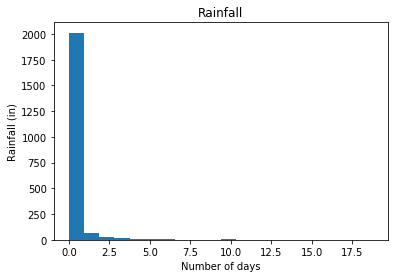

In [164]:
plt.hist(rainfall, bins=20)

plt.xlabel("Number of days")
plt.ylabel("Rainfall (in)")
plt.title("Rainfall")

plt.show()

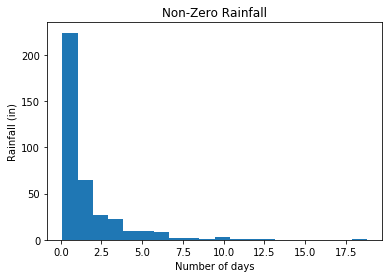

In [165]:
non_zero_rainfall = rainfall[rainfall != 0]
plt.hist(non_zero_rainfall, bins=20)

plt.xlabel("Number of days")
plt.ylabel("Rainfall (in)")
plt.title("Non-Zero Rainfall")

plt.show()

plt.show() 

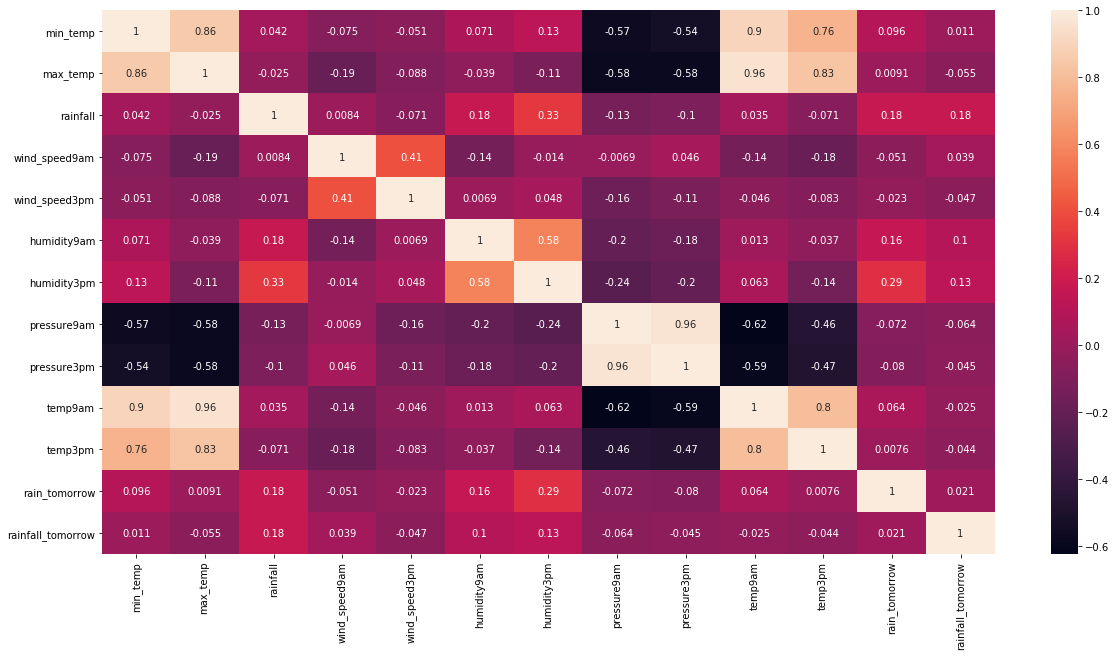

In [186]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True) #generate heatmap, show data value in each cell 

observations: 
- max_temp and temp_9am have high correlation 
- min_temp and temp_9am have high correlation
- pressure_9am ad pressure_3pm have high positive correlation 
- rainfall seems to have the highes positive correlation with humidity_3pm (.29), 
followed by rainfall and then humidity_9am  

In [167]:
# end data analysis and visualization 

In [168]:
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])

In [169]:
input_cols = [
                'min_temp', 
                'max_temp', 
                'wind_speed9am', 
                'wind_speed3pm', 
                'humidity9am', 
                'humidity3pm', 
                'pressure9am', 
                'pressure3pm', 
                'temp9am', 
                'temp3pm',
                'rainfall']

In [170]:
x_val = validate[input_cols]
y_val = validate[['rain_tomorrow']]

In [171]:
x_train = train[input_cols]
y_train = train[['rain_tomorrow']]

In [172]:
x_test = test[input_cols]
y_test = test[['rain_tomorrow']]

In [173]:
nm = NearMiss()
x_train_resampled, y_train_resampled = nm.fit_resample(x_train, y_train)

In [174]:
# y_train = train[['rain_tomorrow']]

In [175]:

scaler = MinMaxScaler().fit(df[input_cols])

x_val[input_cols] = scaler.transform(x_val[input_cols])
x_test[input_cols] = scaler.transform(x_test[input_cols])
# x_train[input_cols] = scaler.transform(x_train[input_cols])
x_train_resampled[input_cols] = scaler.transform(x_train_resampled[input_cols])

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

In [176]:
x_val.describe().loc[['min', 'max']]

,min_temp,max_temp,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,rainfall
min,0.000000,0.041096,0.000000,0.000000,0.0,0.011364,0.000000,0.000000,0.000000,0.0,0.000000
max,0.987952,0.972603,0.733333,0.827586,1.0,1.000000,0.941667,0.991304,0.971014,1.0,0.664894


In [177]:
# model = RandomForestClassifier(n_estimators = 100) 
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train_resampled, y_train_resampled)
# model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [178]:
y_pred = model.predict(x_test)

In [179]:
print('Training Accuracy Score: {:.2f}'.format(model.score(x_train_resampled,y_train_resampled)*100)) #train

Training Accuracy Score: 100.00


In [180]:
print('Test Accuracy Score: {:.2f}'.format(model.score(x_test,y_test)*100)) #train

Test Accuracy Score: 36.09


In [181]:
print('Validation Accuracy Score: {:.2f}'.format(model.score(x_val,y_val)*100)) #validation  

Validation Accuracy Score: 36.41


In [182]:
print('Accuracy Score: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)*100))


# this score would be .82 if we didn't rebalance bc of the large amount of nos 

Accuracy Score: 36.09


In [183]:
print('F1 Score: {:.2f}'.format(metrics.f1_score(y_test, y_pred) * 100))


F1 Score: 30.15


In [184]:
#numerical for random forest 